# Creating outliers for WT02

In [17]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt


if not "../data_processing" in sys.path:
    print("Appended")
    sys.path.append("../data_processing")


import build_dataset


import sys, os
from scipy.stats import skew
from scipy.stats import kurtosis


ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
print("ROOT", ROOT_PATH)
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/utils/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)

import functions as f


c, p = f.color_palette()
sns.set(context='paper', style='whitegrid', palette=np.array(p))
print(ROOT_PATH)
plt.style.use('file://' + ROOT_PATH + "/utils/plotparams.rc")
import wt_data
import ff_transform


ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src


## Building the dataframe (not neccessary if it exists on disk)

In [18]:
# wt_instance = build_dataset.wt_data.load_instance("WTG02",load_minimal=False)
# df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', 
                                                         #power_threshold=2500,plot=False, bins=50, 
                                                         #plot_vertical_lines=False)

# build_dataset.save_dataframe_to_csv(df, 'GbxHssRr_RMS_power>2500_WTG02.csv')

## Reading the built, filtered, dataset

In [19]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG02.csv'
df = pd.read_csv(path)
df.describe()

,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,RMS_component_interval,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,2810.722013,2729.287770,1469.740586,11.248252,194.115734,6.100239,0.457509,0.254320,0.981178,0.360376,...,1.137108,2.089491,1.875750,2.392073,2.823761,2.271125,1.069254,0.632511,0.435221,0.246160
std,273.452548,537.939339,59.670196,2.860017,80.882321,1.652317,0.045476,0.044607,0.295316,0.066903,...,0.139017,0.234858,0.230720,0.412856,0.750731,0.608550,0.263564,0.157723,0.102451,0.051914
min,2500.165283,-37.700001,662.650623,6.600000,0.900000,0.817078,0.249578,0.171429,0.315222,0.275881,...,0.136682,0.239168,0.238460,0.219998,0.280279,0.330837,0.133726,0.086140,0.049666,0.031207
25%,2584.843689,2430.599976,1459.382731,9.400000,130.399994,5.267047,0.423299,0.222723,0.806082,0.344742,...,1.075360,1.987600,1.773638,2.272077,2.306319,1.913431,0.879402,0.516029,0.363250,0.210995
50%,2713.354126,2793.950073,1473.138835,10.400000,162.199997,6.159974,0.458744,0.255291,0.951735,0.355108,...,1.125399,2.120465,1.917171,2.494220,2.860577,2.256783,1.081592,0.623535,0.425135,0.244885
75%,2995.708069,3283.775024,1489.145768,12.500000,262.349991,7.064718,0.494233,0.277727,1.124287,0.365520,...,1.197883,2.221437,2.011429,2.651381,3.440171,2.771768,1.296891,0.759244,0.506057,0.282690
max,3315.529297,3469.699951,1562.194519,25.900000,359.299988,14.584366,0.566679,0.568263,3.365173,1.171859,...,1.598388,2.635439,2.533416,3.186057,4.257551,3.664276,1.716812,1.139778,0.819597,0.372926


## Observation
We see for WT02 that the max RMS value in the gearbox range (10-2000 Hz) is 14.584366. This datapoint is interesting to look at. Maybe filter away this one?

In [20]:
rms = df['RMS_component_interval']
print(f'This is the RMS values for the interval for Gearbox:{ rms }')

This is the RMS values for the interval for Gearbox:0      6.389500
1      5.061433
2      1.857597
3      6.799224
4      6.844513
         ...   
281    6.618701
282    5.376143
283    6.597880
284    8.505770
285    2.710964
Name: RMS_component_interval, Length: 286, dtype: float64


In [ ]:
rms.describe()

### Finding out how many bins (bin range) span across the interval for the frequency we want (10-2000 Hz)

In [ ]:
# Need to find the RMS bins that span across the frequency interval we want...
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50
wt_instance = wt_data.load_instance('WTG02', load_minimal=False)
for interval in wt_instance.ten_second_intervals:
  
    print("Try block")
    try:
        vibration_signal = interval.sensor_df[SENSOR_NAME]
    except:
        continue
    ts = interval.sensor_df['TimeStamp']  # Have this as the y-axis to see how the RMS/frequencies develop
    comp_type = 'gearbox'
    avg_power = interval.op_df["PwrAvg;kW"][0]
    rot_data = interval.high_speed_rot_data

    fast = ff_transform.FastFourierTransform( vibration_signal, ts, comp_type)
    fft, time, centroid, rms, rms_bins, bin_freq = fast.fft_transform_time(rot_data,
                                                                           avg_power,
                                                                           calc_rms_for_bins=True,
                                                                 plot=False,
                                                                 bins=BINS,
                                                                 plot_vertical_lines=False)
    bin_range = bin_freq[1] - bin_freq[0] # Amount of frequencies in each bin
    break

In [ ]:
bin_range

## Starting to create the "fake" dataset
- Start by taking the top 10 rows from the old dataset

In [ ]:
new_dataset = df.head(10)
new_dataset

### Finding out which RMS bins (features) need to be changed. num_bins_overlap

In [21]:
range_gearbox = 2000

num_bins_overlap = range_gearbox/bin_range
num_bins_overlap = int(np.ceil(num_bins_overlap))
print(f'Number of overlapping bins {num_bins_overlap}')

print(num_bins_overlap*bin_range)
print(f"Getting an additional {num_bins_overlap * bin_range - range_gearbox} frequencies...")

Number of overlapping bins 8
2047.9921874701972
Getting an additional 47.99218747019722 frequencies...


In [22]:
new_dataset = df.head(10)
new_dataset

,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,RMS_component_interval,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
0,2818.207520,3291.300049,1487.871218,14.2,226.699997,6.389500,0.404392,0.258909,0.811581,0.344739,...,1.101426,1.969857,1.778854,2.673142,3.386242,2.750154,1.419267,0.809299,0.444020,0.272188
1,2528.062988,2454.500000,1471.267571,10.6,231.699997,5.061433,0.532580,0.244108,1.221325,0.346431,...,1.106000,2.131452,1.824046,2.082840,2.086788,1.563331,0.788437,0.436628,0.294574,0.181487
2,2500.473145,1772.500000,1432.996560,8.4,284.600006,1.857597,0.478452,0.210531,1.090423,0.360744,...,0.967446,1.962500,1.463750,1.369159,1.247210,1.092017,0.519553,0.320830,0.221710,0.146560
3,2555.221924,2492.899902,1465.589029,9.0,132.000000,6.799224,0.512141,0.226217,1.160659,0.358593,...,1.068143,2.376538,1.979047,2.345064,2.218439,1.995184,0.850978,0.474515,0.348262,0.198423
4,3065.522217,3304.800049,1476.364735,12.7,245.000000,6.844513,0.386640,0.276154,1.027501,0.356752,...,1.155076,1.865711,1.766413,2.519427,3.441490,2.888474,1.341962,0.759380,0.538935,0.295528
5,2579.510986,2786.899902,1469.441078,11.3,301.100006,7.930184,0.407514,0.263802,0.860637,0.369790,...,1.160586,2.201416,1.875874,2.447637,3.014397,2.499477,1.200119,0.711053,0.435755,0.275101
6,2537.796631,2466.000000,1493.188802,10.0,131.500000,4.659376,0.517629,0.247286,0.534208,0.332621,...,1.198744,2.199523,2.190827,2.596931,2.703204,1.916277,1.012641,0.576606,0.344559,0.218208
7,2588.696533,2586.899902,1493.971465,11.1,229.600006,4.860157,0.474903,0.279757,0.536629,0.338635,...,1.338610,2.178644,1.917163,2.785755,3.027529,2.128784,0.977825,0.608689,0.397932,0.234199
8,3300.607666,2901.800049,1463.211760,8.3,92.699997,8.713964,0.426224,0.253064,0.872180,0.371431,...,1.140399,2.190679,1.957966,2.462485,2.796271,2.590859,1.137157,0.600736,0.447692,0.247014
9,2534.070312,2769.000000,1498.249483,9.8,141.899994,4.653982,0.538275,0.251859,0.677084,0.340579,...,1.235603,2.258962,2.083371,2.619901,2.712242,1.875764,0.948645,0.556748,0.351959,0.212861


In [23]:
colum_names = new_dataset.columns.values.tolist()
filtered_columns = [x for x in colum_names if '_RMS_' in x]

filtered_columns = filtered_columns[:num_bins_overlap]

In [24]:
total_rms_array = np.zeros(num_bins_overlap)
len(total_rms_array)

8

In [25]:
from IPython.display import Markdown as md

import matplotlib.pyplot as plt
# Find the sum of the 8 first RMS vals:

def calc_rms(dataframe,num_bins_overlap):
    total_rms_array = np.zeros(num_bins_overlap)
    for index, row in dataframe.iterrows():
        rms_array = []
        rms_sum = 0
        for col in filtered_columns:
            rms_sum += row[col]
            rms_array.append(row[col])
        print(f"Row: {index} The sum for the first {num_bins_overlap} rms is: {rms_sum}")
        total_rms_array = [x + y for x, y in zip(total_rms_array,rms_array)]


    avg_array = [x/len(dataframe) for x in total_rms_array] 
    fig = plt.figure(figsize=(15,5))    
    plt.plot(avg_array)
    plt.title(f"Average RMS values for the first 8 bins for {dataframe.shape[0]} rows")
    plt.margins(0)
    plt.show

    print(avg_array)

### Inspecting the RMS values for the first n overlapping bins in the original dataset

Row: 0 The sum for the first 8 rms is: 9.9881337981709
Row: 1 The sum for the first 8 rms is: 9.157067449356365
Row: 2 The sum for the first 8 rms is: 4.746570844917494
Row: 3 The sum for the first 8 rms is: 10.682260268059885
Row: 4 The sum for the first 8 rms is: 10.50019810222565
Row: 5 The sum for the first 8 rms is: 11.459094206534093
Row: 6 The sum for the first 8 rms is: 7.942498062534884
Row: 7 The sum for the first 8 rms is: 8.286068105188752
Row: 8 The sum for the first 8 rms is: 12.293912874347614
Row: 9 The sum for the first 8 rms is: 8.288142173555023
Row: 10 The sum for the first 8 rms is: 11.754859713484688
Row: 11 The sum for the first 8 rms is: 5.168594567225323
Row: 12 The sum for the first 8 rms is: 12.01414022193613
Row: 13 The sum for the first 8 rms is: 10.21187368240467
Row: 14 The sum for the first 8 rms is: 9.651287073789716
Row: 15 The sum for the first 8 rms is: 10.681855382659052
Row: 16 The sum for the first 8 rms is: 10.913543750009422
Row: 17 The sum for 

Row: 199 The sum for the first 8 rms is: 8.20395606819455
Row: 200 The sum for the first 8 rms is: 9.268507787604749
Row: 201 The sum for the first 8 rms is: 9.629789700129626
Row: 202 The sum for the first 8 rms is: 9.944748338066487
Row: 203 The sum for the first 8 rms is: 9.908097230871205
Row: 204 The sum for the first 8 rms is: 9.3494816839498
Row: 205 The sum for the first 8 rms is: 10.690476788468105
Row: 206 The sum for the first 8 rms is: 7.214515185134453
Row: 207 The sum for the first 8 rms is: 10.880643299256809
Row: 208 The sum for the first 8 rms is: 10.109017323677612
Row: 209 The sum for the first 8 rms is: 7.685766527572914
Row: 210 The sum for the first 8 rms is: 4.470079899672885
Row: 211 The sum for the first 8 rms is: 10.56587368625389
Row: 212 The sum for the first 8 rms is: 8.360615539176255
Row: 213 The sum for the first 8 rms is: 9.412690215801028
Row: 214 The sum for the first 8 rms is: 7.970336602606886
Row: 215 The sum for the first 8 rms is: 9.9097201342727

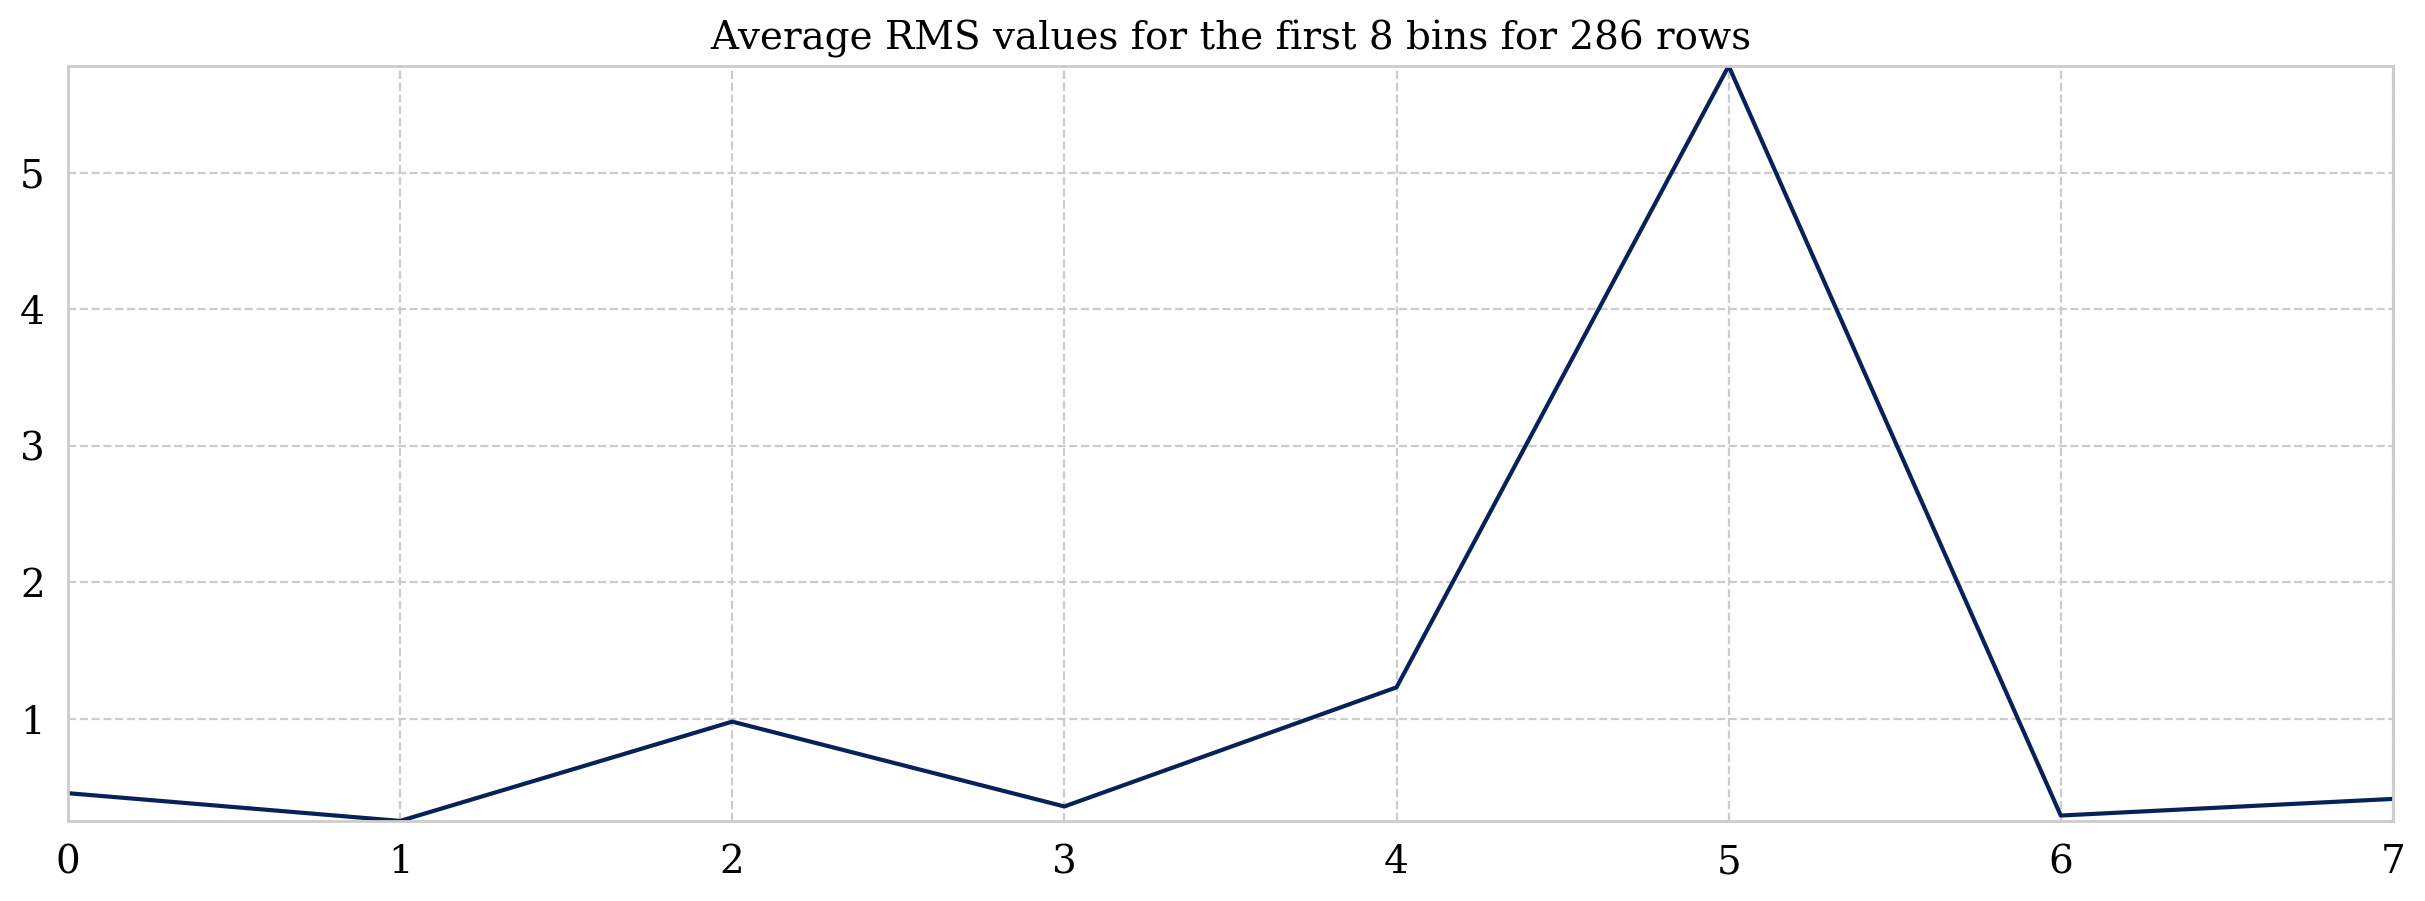

In [14]:
calc_rms(df,int(num_bins_overlap))

## The plan 
The plan here is to update the first 8 RMS bin values based on the average seen above, and keep the remaining {{BINS-num_bins_overlap}}


Row: 0 The sum for the first 8 rms is: 19.9762675963418
Row: 1 The sum for the first 8 rms is: 18.31413489871273
Row: 2 The sum for the first 8 rms is: 9.493141689834989
Row: 3 The sum for the first 8 rms is: 21.36452053611977
Row: 4 The sum for the first 8 rms is: 21.0003962044513
Row: 5 The sum for the first 8 rms is: 22.918188413068187
Row: 6 The sum for the first 8 rms is: 15.884996125069769
Row: 7 The sum for the first 8 rms is: 16.572136210377504
Row: 8 The sum for the first 8 rms is: 24.587825748695227
Row: 9 The sum for the first 8 rms is: 16.576284347110047
[0.9357499429297695, 0.5023374449466791, 1.7584454413185688, 0.704062961894923, 2.621970703396454, 10.847244139257272, 0.5672881202482388, 0.7316904229862272]


,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,RMS_component_interval,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
0,2818.207520,3291.300049,1487.871218,14.2,226.699997,6.389500,0.808785,0.517818,1.623162,0.689477,...,1.101426,1.969857,1.778854,2.673142,3.386242,2.750154,1.419267,0.809299,0.444020,0.272188
1,2528.062988,2454.500000,1471.267571,10.6,231.699997,5.061433,1.065160,0.488217,2.442650,0.692862,...,1.106000,2.131452,1.824046,2.082840,2.086788,1.563331,0.788437,0.436628,0.294574,0.181487
2,2500.473145,1772.500000,1432.996560,8.4,284.600006,1.857597,0.956903,0.421062,2.180846,0.721488,...,0.967446,1.962500,1.463750,1.369159,1.247210,1.092017,0.519553,0.320830,0.221710,0.146560
3,2555.221924,2492.899902,1465.589029,9.0,132.000000,6.799224,1.024282,0.452434,2.321319,0.717186,...,1.068143,2.376538,1.979047,2.345064,2.218439,1.995184,0.850978,0.474515,0.348262,0.198423
4,3065.522217,3304.800049,1476.364735,12.7,245.000000,6.844513,0.773280,0.552309,2.055002,0.713503,...,1.155076,1.865711,1.766413,2.519427,3.441490,2.888474,1.341962,0.759380,0.538935,0.295528
5,2579.510986,2786.899902,1469.441078,11.3,301.100006,7.930184,0.815028,0.527603,1.721273,0.739580,...,1.160586,2.201416,1.875874,2.447637,3.014397,2.499477,1.200119,0.711053,0.435755,0.275101
6,2537.796631,2466.000000,1493.188802,10.0,131.500000,4.659376,1.035257,0.494571,1.068416,0.665243,...,1.198744,2.199523,2.190827,2.596931,2.703204,1.916277,1.012641,0.576606,0.344559,0.218208
7,2588.696533,2586.899902,1493.971465,11.1,229.600006,4.860157,0.949807,0.559514,1.073258,0.677270,...,1.338610,2.178644,1.917163,2.785755,3.027529,2.128784,0.977825,0.608689,0.397932,0.234199
8,3300.607666,2901.800049,1463.211760,8.3,92.699997,8.713964,0.852448,0.506129,1.744361,0.742863,...,1.140399,2.190679,1.957966,2.462485,2.796271,2.590859,1.137157,0.600736,0.447692,0.247014
9,2534.070312,2769.000000,1498.249483,9.8,141.899994,4.653982,1.076549,0.503718,1.354167,0.681157,...,1.235603,2.258962,2.083371,2.619901,2.712242,1.875764,0.948645,0.556748,0.351959,0.212861


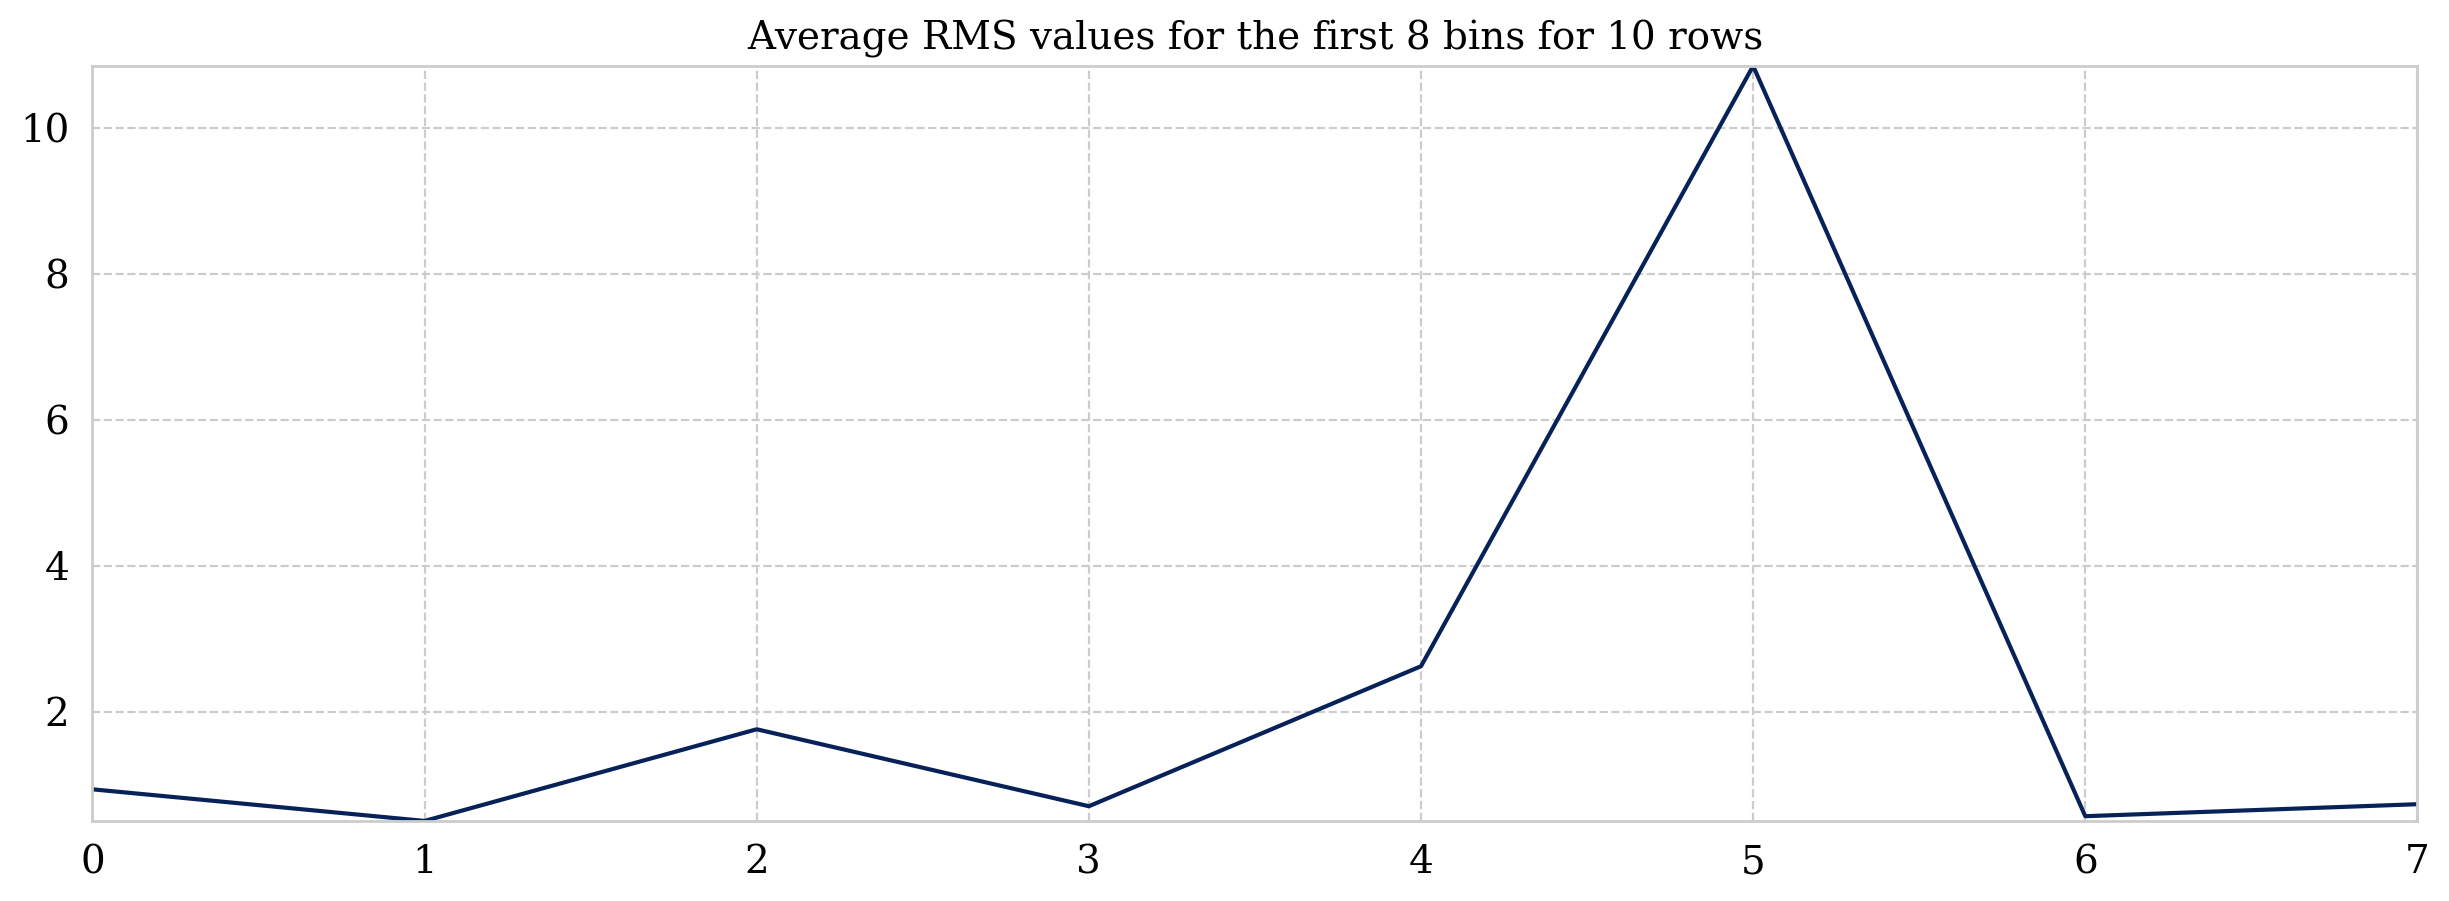

In [15]:
copy_new_df = new_dataset
for i in range(copy_new_df.shape[0]):
    for j in range(num_bins_overlap):
        copy_new_df.at[i,filtered_columns[j]] = copy_new_df.at[i,filtered_columns[j]]*2
calc_rms(copy_new_df, num_bins_overlap)
copy_new_df

In [26]:
copy_new_df.to_csv('fake_data_points.csv',)

In [27]:
df

,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,RMS_component_interval,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
0,2818.207520,3291.300049,1487.871218,14.2,226.699997,6.389500,0.404392,0.258909,0.811581,0.344739,...,1.101426,1.969857,1.778854,2.673142,3.386242,2.750154,1.419267,0.809299,0.444020,0.272188
1,2528.062988,2454.500000,1471.267571,10.6,231.699997,5.061433,0.532580,0.244108,1.221325,0.346431,...,1.106000,2.131452,1.824046,2.082840,2.086788,1.563331,0.788437,0.436628,0.294574,0.181487
2,2500.473145,1772.500000,1432.996560,8.4,284.600006,1.857597,0.478452,0.210531,1.090423,0.360744,...,0.967446,1.962500,1.463750,1.369159,1.247210,1.092017,0.519553,0.320830,0.221710,0.146560
3,2555.221924,2492.899902,1465.589029,9.0,132.000000,6.799224,0.512141,0.226217,1.160659,0.358593,...,1.068143,2.376538,1.979047,2.345064,2.218439,1.995184,0.850978,0.474515,0.348262,0.198423
4,3065.522217,3304.800049,1476.364735,12.7,245.000000,6.844513,0.386640,0.276154,1.027501,0.356752,...,1.155076,1.865711,1.766413,2.519427,3.441490,2.888474,1.341962,0.759380,0.538935,0.295528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2519.122070,2854.899902,1473.656181,9.3,137.899994,6.618701,0.524702,0.238736,1.079799,0.350066,...,1.116134,2.318005,2.168826,2.421860,2.627996,2.051843,0.987188,0.610960,0.436732,0.245933
282,2911.033203,3316.300049,1518.799610,11.9,269.700012,5.376143,0.428188,0.309431,0.756543,0.344039,...,1.161779,2.104867,1.908290,2.728130,3.834810,2.920477,1.372602,0.800657,0.549640,0.306067
283,2565.018555,2191.800049,1454.645879,9.4,337.299988,6.597880,0.517079,0.192072,1.252033,0.365993,...,1.101780,2.205088,2.097908,2.024115,2.084618,1.524355,0.820152,0.504040,0.359359,0.218452
284,2764.648193,2946.000000,1462.957549,9.6,291.299988,8.505770,0.459424,0.256457,0.944173,0.377344,...,1.078278,1.997585,1.974380,2.388171,2.935721,2.441663,1.220706,0.795259,0.477494,0.299282


# Comparing the mean RMS for the real datapoints with the fake ones

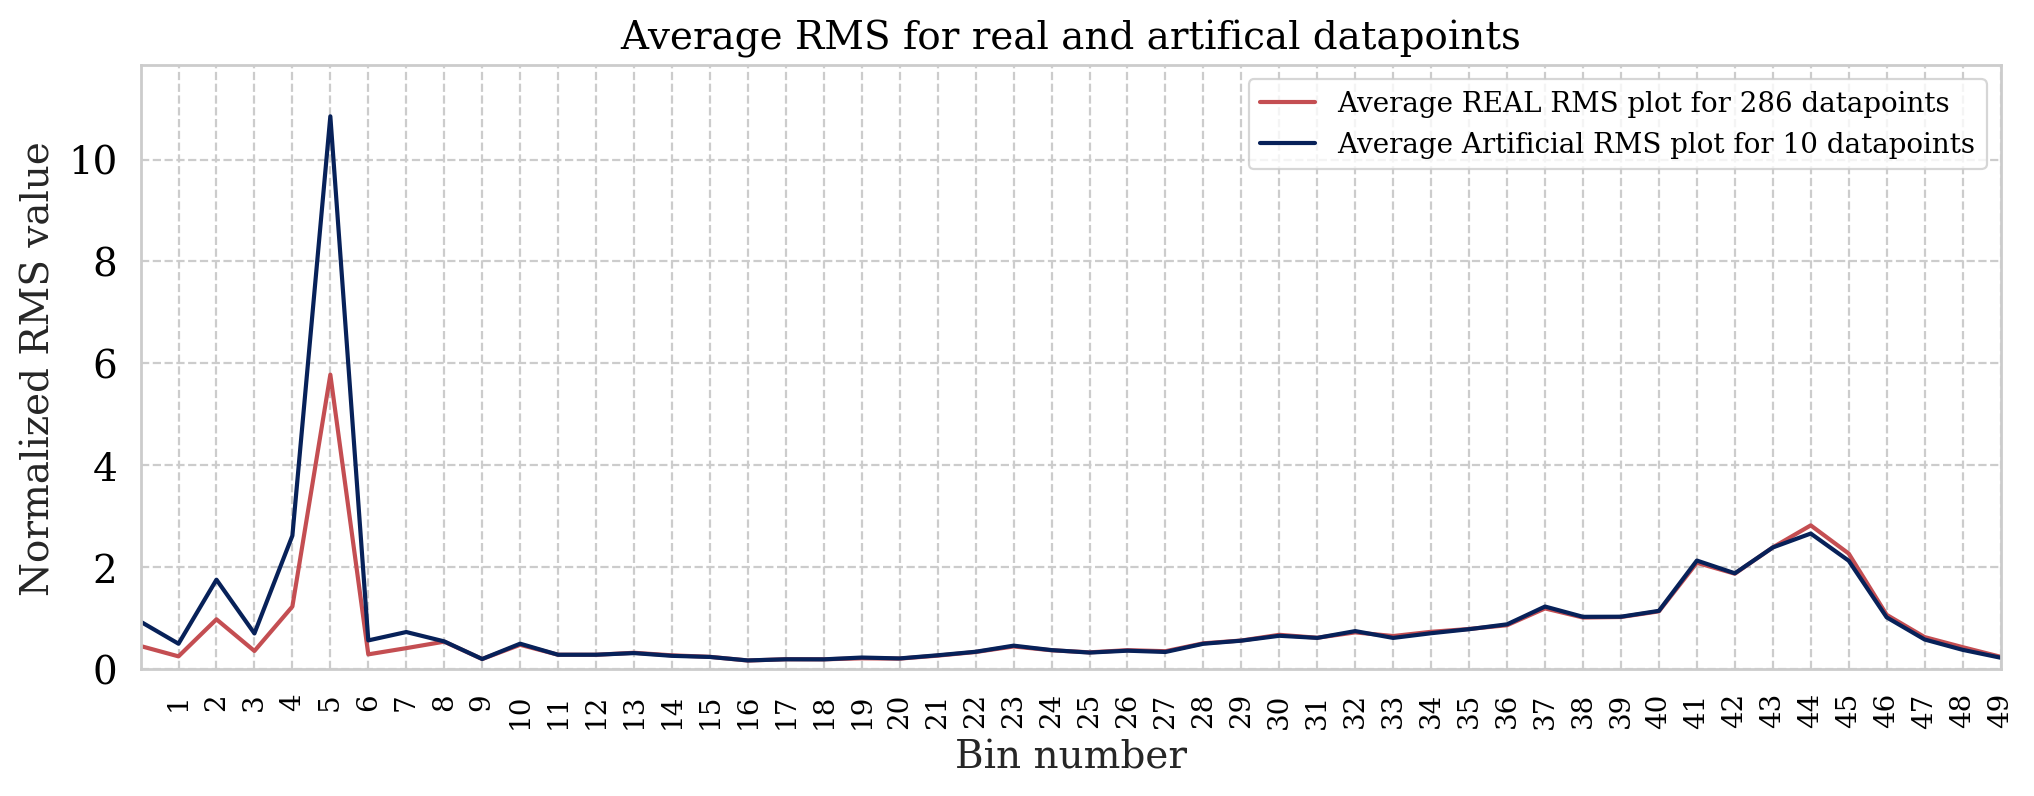

In [117]:
import matplotlib.ticker as ticker

def plot_mean_rms_for_all_bins(df,real_or_fake,fig=None,ax=None):
    plot_columns = df.columns.values.tolist()
    plot_filtered_columns = [x for x in plot_columns if '_RMS_' in x]

    FROM = plot_filtered_columns[0]
    TO = plot_filtered_columns[-1]

    #print(plot_filtered_columns[0])
    df1 = df.loc[ :, FROM : TO ]
    plot_mean = np.mean(df1)

    if (fig == None) or (ax == None):
        fig, ax = plt.subplots()
        plt.plot(plot_mean.values.tolist(),color='r')
        
    else:
        plt.plot(plot_mean.values.tolist())
    
    
    a = np.arange(1,51,1)
    plt.margins(0)
    plt.ylim(0,np.max(plot_mean) + 1)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(10) 
        # specify integer or one of preset strings, e.g.
        #tick.label.set_fontsize('x-small') 
        tick.label.set_rotation('vertical')

    start, end = ax.get_xlim()
    plt.title(f"Average RMS for real and artifical datapoints")
    ax.set_ylabel("Normalized RMS value")
    ax.set_xlabel("Bin number")
    ax.xaxis.set_ticks(np.arange(1, 50, 1))
    return fig,ax
    


    #plt.plot(plot_mean.values)
    #plt.xticks(np.arange(1,50,1))

    #plt.plot(df.plot_filtered_columns)
fig1, ax1 = plot_mean_rms_for_all_bins(df,'REAL')
fig2, ax2 = plot_mean_rms_for_all_bins(copy_new_df,'FAKE',fig1,ax1)
plt.legend(['Average REAL RMS plot for 286 datapoints','Average Artificial RMS plot for 10 datapoints'],fontsize='10')
plt.show()